# Combining All Data Files

In [1]:
# importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## 1. Reading and Describing all data files

### 1.1 "Company.csv"

This CSV file explains label symbols for each mention of a particular company. The columns are ticker_symbol and company_name. Authors have considered only 5 companies for study since these are the major companies listed on NASDAQ. 

In [2]:
company = pd.read_csv("Company.csv")
print(company)

  ticker_symbol company_name
0          AAPL        apple
1          GOOG   Google Inc
2         GOOGL   Google Inc
3          AMZN   Amazon.com
4          TSLA    Tesla Inc
5          MSFT    Microsoft


### 1.2 "Company_Tweet.csv"

#### 1.2.1 Reading data file

This file contains tweet ids and the company name with which it is related. The columns in this csv file are tweet_id and ticker_symbol. Total number of entries in this file are 4,336,445.

In [3]:
company_tweet = pd.read_csv("Company_Tweet.csv")
print("Shape of this csv : ",company_tweet.shape)
company_tweet.head()

Shape of this csv :  (4336445, 2)


,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


#### 1.2.2 Number of tweets per Company

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64


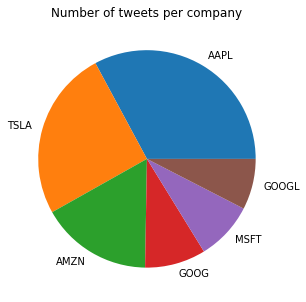

In [4]:
counts = company_tweet['ticker_symbol'].value_counts()


print(counts)

# Counting number of data points in each category
label_count = list(counts)

# class labels
categ_label = list(counts.keys())

plt.figure(figsize=(5,5))
plt.pie(label_count,labels=categ_label)
plt.title("Number of tweets per company")
plt.show()

### 1.3 "Tweet.csv"

This csv file contains details related to all tweets with tweet_id as primary key. The columns in this csv file are 'tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num', 'like_num'. Hence description related to each tweet id can be found in this csv file. Total number of rows in this file are 3,717,964.

<li><b>tweet_id:</b> Identification ID assigned which uniquely identifies each tweet.</li>
<li><b>writer:</b> User tweeter handle who posted this particular tweet</li>
<li><b>post_date:</b> Tweet post date in Unix epoch format</li>
<li><b>Body:</b> Tweet text that user posted</li>
<li><b>comment_num:</b> Number of comments on tweet</li>
<li><b>retweet_num:</b> Number of retweets</li>
<li><b>like_num:</b> Number of likes for the tweet</li>

In [5]:
tweet = pd.read_csv("Tweet.csv")
print("Shape of this csv : ",tweet.shape)
tweet.head()

Shape of this csv :  (3717964, 7)


,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


### 1.4 "CompanyValues.csv"

This value contains details daily market share value changes of Amazon, Apple, Google, Microsoft, and Tesla from mid-2010 to mid-2020. The columns in this csv file are 'ticker_symbol', 'day_date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value'. Total number of rows in this file are 17,528.Description of each column is provided below:

<li><b>ticker_symbol:</b> Symbol uniquely representing each company.</li>
<li><b>day_date:</b> 	Date of the day for which the share price details are given.</li>
<li><b>close_value:</b>	Closing value of the share for that day</li>
<li><b>volume:</b>	Traded volume for that day</li>
<li><b>open_value:</b>	Opening value of the share for that day</li>
<li><b>high_value:</b>	Highest price recorded on a particular day</li>
<li><b>low_value:</b>	Lowest price recorded on a particular day</li>

In [6]:
company_values = pd.read_csv("CompanyValues.csv")
print("Shape of this csv : ",company_values.shape)
company_values.head()

Shape of this csv :  (17528, 7)


,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


# 2. Merging all data files

With the given 4 csv files, there is a need to combine data to create a dataset suitable for ML Formulation. The CSV files can be combined as follows:

<img src="https://drive.google.com/uc?id=1b2JEntgO-g6ve9zoZhSINY7_iXmDI1A7">

<li>“tweet.csv” has all tweet information with respect to each unique tweet_id while “company_tweet.csv” has tweet id along with the company ticker symbol as label.</li>
<li> Hence with a merge of these two files, we can get tweet text, respective number of retweets, number of likes etc. along with company names as class labels. </li>

In [7]:
company_tweet = pd.merge(company_tweet,tweet,on='tweet_id')
company_tweet.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


<li> Now if we combine this obtained dataframe with “company_values.csv” on “ticker_symbol” and “post_date” then we would get all the stock price details for each tweet on a particular day.</li>
<li> But first we need to convert "post_date" column from unix epoch format to normal date format.  </li>

In [8]:
import time

# the timezone was EST and the code is being run in IST. Hence 19800 was subtracted in order to compensate for this issue.
company_tweet['post_date'] = company_tweet.post_date.apply(lambda x:time.strftime('%Y-%m-%d', time.localtime(x-19800)))
company_tweet.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


<li> Now the date column name in "company_values.csv" is "day_date" while in "company_tweet.csv" it is "post_date". </li>
<li> To merge these, column names should be same. Hence, there is a need to update column names. </li>

In [9]:
company_values = company_values.set_axis(['ticker_symbol', 'post_date', 'close_value', 'volume', 'open_value',
       'high_value', 'low_value'],axis=1)
company_values.head()

,ticker_symbol,post_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


Let us merge these dataframes now

In [10]:
all_merged = pd.merge(company_tweet,company_values,on=['ticker_symbol','post_date'])
all_merged.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,close_value,volume,open_value,high_value,low_value
0,550803612197457920,AAPL,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,110.38,41304780,112.82,113.13,110.21
1,550803610825928706,AAPL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,110.38,41304780,112.82,113.13,110.21
2,550803225113157632,AAPL,MacHashNews,2015-01-01,Rumor Roundup: What to expect when you're expe...,0,0,0,110.38,41304780,112.82,113.13,110.21
3,550802957370159104,AAPL,WaltLightShed,2015-01-01,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,110.38,41304780,112.82,113.13,110.21
4,550802855129382912,AAPL,2waystrading,2015-01-01,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,110.38,41304780,112.82,113.13,110.21


<li> Now let us work on class label. This is a part of experimentation but for now we can proceed with class label as % change on closing prices of stocks. </li>
<li> % change in closing prices of stocks can be determined as follows: </li>

In [12]:
label_dict = {}

companies = all_merged['ticker_symbol'].unique()  # getting all comapny names


# with this loop we are creating a dictionary whose structure can be defined as
# dict[company_name][post_date] = % closing change value
for comp_name in tqdm(companies):   # Loop to iterate through all company names
    label_dict[comp_name] = {}      # empty dict to store % change for all dates
    
    # getting DF with only required columns
    temp = all_merged[all_merged.ticker_symbol == comp_name][['post_date','close_value','ticker_symbol']].drop_duplicates()
    
    
    dates = temp['post_date'].values            # getting all dates in the data
    close_values = temp['close_value'].values   # close values
    
    # getting sorted indices of dates to get % closing value change w.r.t. previous day.
    temp = dates.argsort()                      
    
    # loop to iterate through all dates
    for i in range((len(temp))):
        if i==0:
            # for first date in dataset, there is no previous day hence this is considered to be zero change
            label_dict[comp_name][dates[i]] = 0
        else:
            # Adding elements to dict as per structure stated above
            label_dict[comp_name][dates[temp[i]]] = ((close_values[temp[i]]-close_values[temp[i-1]])/close_values[temp[i-1]])*100

# adding all class labels to the dataframe
all_merged['close_value_change'] = all_merged.apply(lambda x:label_dict[x['ticker_symbol']][x['post_date']],axis=1)
all_merged['change_label'] = all_merged.close_value_change.apply(lambda x:-x if x<0 else x)
all_merged['class_sign'] = all_merged.close_value_change.apply(lambda x:0 if x<0 else 1)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.40it/s]


In [13]:
all_merged.head()

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num,close_value,volume,open_value,high_value,low_value,close_value_change,change_label,class_sign
0,550803612197457920,AAPL,SentiQuant,2015-01-01,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,110.38,41304780,112.82,113.13,110.21,0.0,0.0,1
1,550803610825928706,AAPL,SentiQuant,2015-01-01,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,110.38,41304780,112.82,113.13,110.21,0.0,0.0,1
2,550803225113157632,AAPL,MacHashNews,2015-01-01,Rumor Roundup: What to expect when you're expe...,0,0,0,110.38,41304780,112.82,113.13,110.21,0.0,0.0,1
3,550802957370159104,AAPL,WaltLightShed,2015-01-01,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,110.38,41304780,112.82,113.13,110.21,0.0,0.0,1
4,550802855129382912,AAPL,2waystrading,2015-01-01,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,110.38,41304780,112.82,113.13,110.21,0.0,0.0,1


In [14]:
# storing all merged dataframes in order to use this for further processing
all_merged.to_csv("final_data.csv",index=False)